 # Practical guide on how to use the protein library 





The library relies on the creation of one object per each chemical specie. These objects store the specific parameters of the chemical specie they represent, e.g. radi, pKa, charge, etc. This library provides tools that use these objects to set-up molecular dynamics simulations using Espresso. First, let us load the protein library:


In [1]:
import protein_library as pl

Let us ilustrate this concept with the example of a peptide. A peptide is a macromolecule which is composed by several aminoacids which, in turn, have several chemical groups. In the same way, in this library a peptide object contains several aminoacid objects. In turn, each aminoacid object contains bead objects, whose number depends on the desired model. 

Practically, to create a peptide object one only needs to provide the aminoacid sequence to the library. The prefered format is a single string using the one-letter aminoacid code of the peptide. The amino and carboxyl ends are denoted as 'c' and 'n' respectively and must be provided in lower case. 

In [2]:
from protein_library import protein

pep_sequence="cGHACCFVn"
peptide1 = protein(sequence=pep_sequence)

Once the peptide object is created, one can access to its specific information by looping over its sequence


In [3]:
def write_protein_parameters(protein):

    print("Peptide with ", protein.beads_per_monomer, " beads per aminoacid")
    for aminoacid in protein.sequence:

        print("Aminoacid name \t pKa")
        print("\t", aminoacid.name, "\t", aminoacid.pKa)
        print("\t \t Beads name \t radi \t\t charge \t\t\t type")
        for bead in aminoacid.part:

            print("\t\t\t", bead.name, "\t",  bead.radi, "\t", bead.q, "\t\t", bead.type)

print("First example:")
write_protein_parameters(peptide1)

First example:
Peptide with  1  beads per aminoacid
Aminoacid name 	 pKa
	 c 	 3.6
	 	 Beads name 	 radi 		 charge 			 type
			 c 	 0.5 sigma 	 {'neutral': 0, 'charged': -1} 		 {'neutral': 50, 'charged': 51}
Aminoacid name 	 pKa
	 G 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 G 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 38}
Aminoacid name 	 pKa
	 H 	 6.8
	 	 Beads name 	 radi 		 charge 			 type
			 H 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 24, 'charged': 25}
Aminoacid name 	 pKa
	 A 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 A 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 40}
Aminoacid name 	 pKa
	 C 	 8.3
	 	 Beads name 	 radi 		 charge 			 type
			 C 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 36, 'charged': 37}
Aminoacid name 	 pKa
	 C 	 8.3
	 	 Beads name 	 radi 		 charge 			 type
			 C 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 36, 'charged': 37}
Aminoacid name 	 pKa
	 F 	 None
	 	 Beads name 	 radi 		 charge 			 type


The library internally works with the one letter aminoacid code. However, the user can also provide the sequence in the three-letter format, separated by hyphens

In [4]:
three_letter_sequence="COOH-GLY-HIS-ALA-CYS-CYS-PHE-VAL-NH2"

peptide2 = protein(sequence=three_letter_sequence)
print("Second example:")
write_protein_parameters(peptide2)

Second example:
Peptide with  1  beads per aminoacid
Aminoacid name 	 pKa
	 c 	 3.6
	 	 Beads name 	 radi 		 charge 			 type
			 c 	 0.5 sigma 	 {'neutral': 0, 'charged': -1} 		 {'neutral': 50, 'charged': 51}
Aminoacid name 	 pKa
	 G 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 G 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 38}
Aminoacid name 	 pKa
	 H 	 6.8
	 	 Beads name 	 radi 		 charge 			 type
			 H 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 24, 'charged': 25}
Aminoacid name 	 pKa
	 A 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 A 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 40}
Aminoacid name 	 pKa
	 C 	 8.3
	 	 Beads name 	 radi 		 charge 			 type
			 C 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 36, 'charged': 37}
Aminoacid name 	 pKa
	 C 	 8.3
	 	 Beads name 	 radi 		 charge 			 type
			 C 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 36, 'charged': 37}
Aminoacid name 	 pKa
	 F 	 None
	 	 Beads name 	 radi 		 charge 			 type

or a mix between both nomenclatures, including lower/upper case  missprints. Note that one needs to be carefull with missprints in "C" and "N" letters since the lower/upper case have different meaning (e.g. "c" = COOH and "C" = CYS)

In [5]:
mix_sequence=["COOH","G","HIS","a", "Cys", "C", "f", "VAL", "n"]
peptide3 = protein(sequence=mix_sequence)
print("Third example:")
write_protein_parameters(peptide3)

Third example:
Peptide with  1  beads per aminoacid
Aminoacid name 	 pKa
	 c 	 3.6
	 	 Beads name 	 radi 		 charge 			 type
			 c 	 0.5 sigma 	 {'neutral': 0, 'charged': -1} 		 {'neutral': 50, 'charged': 51}
Aminoacid name 	 pKa
	 G 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 G 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 38}
Aminoacid name 	 pKa
	 H 	 6.8
	 	 Beads name 	 radi 		 charge 			 type
			 H 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 24, 'charged': 25}
Aminoacid name 	 pKa
	 A 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 A 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 40}
Aminoacid name 	 pKa
	 C 	 8.3
	 	 Beads name 	 radi 		 charge 			 type
			 C 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 36, 'charged': 37}
Aminoacid name 	 pKa
	 C 	 8.3
	 	 Beads name 	 radi 		 charge 			 type
			 C 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 36, 'charged': 37}
Aminoacid name 	 pKa
	 F 	 None
	 	 Beads name 	 radi 		 charge 			 type


The library includes a sequence parser that reads the input sequence and automatically transforms it to the one-letter nomenclature. As a result, examples 1-3 yield to the creation of the same protein object.

By default, the library assumes that the peptide is modelled as a linear chain with one bead per aminoacid. However, the user can also choose to model the peptide as a chain with side chains, i.e. with two beads per aminoacid.

In [6]:
two_bead_peptide=protein(sequence=pep_sequence,  beads_per_monomer=2)
print("Example of a peptide with 2 beads per monomer:")
write_protein_parameters(two_bead_peptide)

Example of a peptide with 2 beads per monomer:
Peptide with  2  beads per aminoacid
Aminoacid name 	 pKa
	 c 	 3.6
	 	 Beads name 	 radi 		 charge 			 type
			 c 	 0.5 sigma 	 {'neutral': 0, 'charged': -1} 		 {'neutral': 50, 'charged': 51}
Aminoacid name 	 pKa
	 G 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 C_alpha 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 20}
			 G 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 38}
Aminoacid name 	 pKa
	 H 	 6.8
	 	 Beads name 	 radi 		 charge 			 type
			 C_alpha 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 20}
			 H 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 24, 'charged': 25}
Aminoacid name 	 pKa
	 A 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 C_alpha 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 20}
			 A 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 40}
Aminoacid name 	 pKa
	 C 	 8.3
	 	 Beads name 	 radi 		 charge 			 type
			 C_alpha 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 20}
			 C 	 0.5 sigma 	 {'charged': 1, 'neu

Regarding the pKa-values of the aminoacids, the library contains different stablished sets of values that can be loaded using the following keywords: "hass" (Ref. 1), "platzer" (Ref. 2), "crchandbook" (Ref. 3) or "nozaki" (Ref. 4). Values for the phosphorilated aminoacids J (pSER) U (pTHR) and Z (pTYR) are always taken from Ref. 5. By default, the library asumes the pKa-values provided in Ref. 1 (Hass et al.). However, the user can choose another set of pKa-values:


In [7]:
pKacrc_peptide=protein(sequence=pep_sequence,  pKa_set="crchandbook")
print("Example peptide with pKa-values from the CRC handbook:")
write_protein_parameters(pKacrc_peptide)
print()

Example peptide with pKa-values from the CRC handbook:
Peptide with  1  beads per aminoacid
Aminoacid name 	 pKa
	 c 	 3.6
	 	 Beads name 	 radi 		 charge 			 type
			 c 	 0.5 sigma 	 {'neutral': 0, 'charged': -1} 		 {'neutral': 50, 'charged': 51}
Aminoacid name 	 pKa
	 G 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 G 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 38}
Aminoacid name 	 pKa
	 H 	 6.0
	 	 Beads name 	 radi 		 charge 			 type
			 H 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 24, 'charged': 25}
Aminoacid name 	 pKa
	 A 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 A 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 40}
Aminoacid name 	 pKa
	 C 	 8.18
	 	 Beads name 	 radi 		 charge 			 type
			 C 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 36, 'charged': 37}
Aminoacid name 	 pKa
	 C 	 8.18
	 	 Beads name 	 radi 		 charge 			 type
			 C 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 36, 'charged': 37}
Aminoacid name 	 pKa
	 F 	 None

Alternatively, the user can provide custom pKa-values for all or some of the aminoacids. The custom pKa-values must be provided in a dictionary:


In [8]:
dict_pKa={"c": 4.25, "CYS": 8.3999}

custom_peptide=protein(sequence=pep_sequence,  pKa_set="custom", pKa_custom=dict_pKa)
print("Example peptide with custom pKa-values:")
write_protein_parameters(custom_peptide)

Example peptide with custom pKa-values:
Peptide with  1  beads per aminoacid
Aminoacid name 	 pKa
	 c 	 4.25
	 	 Beads name 	 radi 		 charge 			 type
			 c 	 0.5 sigma 	 {'neutral': 0, 'charged': -1} 		 {'neutral': 50, 'charged': 51}
Aminoacid name 	 pKa
	 G 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 G 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 38}
Aminoacid name 	 pKa
	 H 	 6.8
	 	 Beads name 	 radi 		 charge 			 type
			 H 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 24, 'charged': 25}
Aminoacid name 	 pKa
	 A 	 None
	 	 Beads name 	 radi 		 charge 			 type
			 A 	 0.5 sigma 	 {'neutral': 0} 		 {'neutral': 40}
Aminoacid name 	 pKa
	 C 	 8.3999
	 	 Beads name 	 radi 		 charge 			 type
			 C 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 36, 'charged': 37}
Aminoacid name 	 pKa
	 C 	 8.3999
	 	 Beads name 	 radi 		 charge 			 type
			 C 	 0.5 sigma 	 {'charged': 1, 'neutral': 0} 		 {'neutral': 36, 'charged': 37}
Aminoacid name 	 pKa
	 F 	 None
	 	 Beads

 The pKa-values not specified by the user are assumed to be equal to those provided in Ref. 1 (Hass et al.).

Once the user creates the peptide object with the desired properties, the library contains several useful modules that help the user to set-up a constant pH simulation of such peptide with Espresso. For instance, let us consider the case that you want to simulate two peptide chains of sequence "cGHACCFVn" using the two bead model and the default pKa-values. 

In [9]:
peptide=protein(sequence=pep_sequence,  beads_per_monomer=2)
peptide.N=2 # Number of protein chains desired in our system, by default 1. 

import espressomd

system = espressomd.System(box_l=[len(peptide.sequence)*3] * 3) # Instance of the espresso simulation sistem

The library can be used to directly create the peptide into the espresso system.  The user if the initial state of the titrable aminoacid is "neutral" or "charged", by default the neutral case is considered.

In [10]:
pl.create_protein(system, peptide, initial_state='charged')

The ids  of all the particles created in the system are stored in the peptide object and its sub-objects. Ids belonging to different peptide chains are stored in separated lists.

In [11]:
print("Ids of the peptide chains:")
print(peptide.ids)
print()
print("Ids of each aminoacid")

for aminoacid in peptide.sequence:

    print(aminoacid.name, " ids: ", aminoacid.ids)
    for bead in aminoacid.part:
        print("bead ", bead.name, " ids: ", bead.ids, "state ", bead.state, "charge: ", bead.q[bead.state])

Ids of the peptide chains:
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]

Ids of each aminoacid
c  ids:  [[1], [17]]
bead  c  ids:  [[1], [17]] state  charged charge:  -1
G  ids:  [[2, 3], [18, 19]]
bead  C_alpha  ids:  [[2], [18]] state  neutral charge:  0
bead  G  ids:  [[3], [19]] state  neutral charge:  0
H  ids:  [[4, 5], [20, 21]]
bead  C_alpha  ids:  [[4], [20]] state  neutral charge:  0
bead  H  ids:  [[5], [21]] state  charged charge:  1
A  ids:  [[6, 7], [22, 23]]
bead  C_alpha  ids:  [[6], [22]] state  neutral charge:  0
bead  A  ids:  [[7], [23]] state  neutral charge:  0
C  ids:  [[8, 9], [24, 25]]
bead  C_alpha  ids:  [[8], [24]] state  neutral charge:  0
bead  C  ids:  [[9], [25]] state  charged charge:  1
C  ids:  [[10, 11], [26, 27]]
bead  C_alpha  ids:  [[10], [26]] state  neutral charge:  0
bead  C  ids:  [[11], [27]] state  charged charge:  1
F  ids:  [[12, 13], [28, 29]]
bead  C_alpha  id

The user can also create counter ions particles of the peptide chains using the module provided in this library


In [12]:
cation, anion = pl.create_counterions(system,peptide)

which returns particle objects containing all the information of the counter-ions generated

In [13]:
print("Cation info: charge = ", cation.q, " number of particles= ", cation.N , " type = ", cation.type, " ids : ", cation.ids)
print("anion info: charge = ", anion.q, " number of particles= ", anion.N , " type = ", anion.type, " ids : ", anion.ids)

Cation info: charge =  1  number of particles=  2  type =  18  ids :  [33, 34]
anion info: charge =  -1  number of particles=  8  type =  19  ids :  [35, 36, 37, 38, 39, 40, 41, 42]


The library can be used to quickly set-up all the acid/base reactions present in the peptide

In [14]:
from espressomd import reaction_ensemble

RE = reaction_ensemble.ConstantpHEnsemble(temperature=1, exclusion_radius=1, seed=12345)
pl.setup_protein_acidbase_reactions(RE, peptide, cation)


The library can also be used to calculate the total number of acidic/basic groups in peptide chains,

In [15]:
N_titrable_groups=pl.count_titrable_groups(peptide)
print("Number of titrable groups in peptide chains: ", N_titrable_groups)

Number of titrable groups in peptide chains:  10


and to set-up espresso to track in which state are the ionizable groups during the simulation

In [16]:
pl.track_ionization(system, peptide)

At this stage, the system is ready to run a simulation with Espresso. Here, we ilustrate its use for a set of simulation done for pH values ranging from 2 to 12

In [17]:
import numpy as np

pH = np.linspace(2, 12, num=20)
Steps_per_sim= 1000
steps_eq=int(Steps_per_sim/3)
Z_pH=[] # Average charge list

# The trajectories of the simulations will be stored in separed files for latter visualizaation using espresso built-up functions and stored in folder 'frames'

from espressomd.io.writer import vtf
import os

if not os.path.exists('./frames'):
    os.makedirs('./frames')

# Write the initial state

with open('frames/trajectory0.vtf', mode='w+t') as coordinates:
    vtf.writevsf(system, coordinates)
    vtf.writevcf(system, coordinates)

N_steps_print= 100  # Write the trajectory every 100 simulation steps
N_frame=0

for pH_value in pH:

    Z_sim=[]
    RE.constant_pH = pH_value

    for step in range(Steps_per_sim+steps_eq):

        RE.reaction(N_titrable_groups)

        if ( step > steps_eq):

            Z, Z2=pl.calculate_protein_charge(system,peptide)
            Z_sim.append(Z)

        if (step % N_steps_print == 0) :

            N_frame+=1
            with open('frames/trajectory'+str(N_frame)+'.vtf', mode='w+t') as coordinates:
                vtf.writevsf(system, coordinates)
                vtf.writevcf(system, coordinates)

    Z_sim=np.array(Z_sim)
    Z_pH.append(Z_sim.mean())
    print("pH = {:6.4g} done".format(pH_value))

pH =      2 done
pH =  2.526 done
pH =  3.053 done
pH =  3.579 done
pH =  4.105 done
pH =  4.632 done
pH =  5.158 done
pH =  5.684 done
pH =  6.211 done
pH =  6.737 done
pH =  7.263 done
pH =  7.789 done
pH =  8.316 done
pH =  8.842 done
pH =  9.368 done
pH =  9.895 done
pH =  10.42 done
pH =  10.95 done
pH =  11.47 done
pH =     12 done


The results of the simulation should be compared with the Henderson-Hasselbach analytical prediction for an ideal system. The library also provides a module that computes the ideal peptide charge predicted by  Henderson-Hasselbach theory for a given set of pH values:

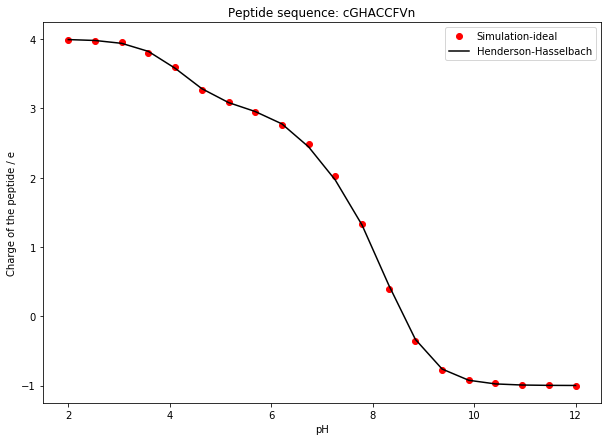

In [18]:
Z_HH = pl.calculate_HH(pH, peptide)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(pH, Z_pH, "ro", label='Simulation-ideal')
ax.plot(pH, Z_HH, "-k", label='Henderson-Hasselbach')
plt.legend()
plt.xlabel('pH')
plt.ylabel('Charge of the peptide / e')
plt.title('Peptide sequence: '+ pep_sequence)
plt.show()


References

[1] Hass MA, Mulder FAA. Contemporary NMR Studies of Protein Electrostatics. Annu Rev Biophys. 2015;44:53-75.

[2] Platzer G, Okon M, McIntosh LP. 2014. pH-dependent random coil 1 H, 13 C, and 15 N chemical shifts of the ionizable amino acids: a guide for protein pK a measurements. J. Biomol. NMR 60:109–29

[3] Handbook of Chemistry and Physics, 72nd Edition, CRC Press, Boca Raton, FL, 1991.

[4] Y. Nozaki and C. Tanford, Methods Enzymol., 1967, 11, 715–734.

[5] Bienkiewicz & K.J. Lumb, J Biomol NMR 15: 203-206 (1999).

